### Problem statment:

With increased number of energy reports from international and business organizations, it is now necessary to have an idea where trends are heading in the energy debate. 

One way to see were trends are is to get the main keywords or the main themes of discussions through processing words from published energy reports. 

### The Goal

produce a wordbacg for each report.

In [2]:
!pip install PyPDF2

     ---------------------------------------- 77.6/77.6 KB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61086 sha256=a35f8de78bb74f459de67fb53b170e5694f251a1a868e1f1c0ca756a83c7f5b7
  Stored in directory: c:\users\m.amer\appdata\local\pip\cache\wheels\80\1a\24\648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


You should consider upgrading via the 'c:\users\m.amer\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [49]:
import os
import sys
import re
import time
import PyPDF2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords');
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M.Amer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M.Amer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def getPageCount(pdf_file):

    pdfFileObj = open(pdf_file, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    pages = pdfReader.numPages
    return pages

In [9]:
def extractData(pdf_file, page):

    pdfFileObj = open(pdf_file, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    pageObj = pdfReader.getPage(page)
    data = pageObj.extractText()
    return data

In [10]:
def getWordCount(data):

    data=data.split()
    return len(data)

In [16]:
numPages = getPageCount('IEA - World Energy Outlook 2021.pdf')

In [14]:
data = extractData('IEA - World Energy Outlook 2021.pdf', 10)

In [35]:
text_total = " "
for i in range(numPages):
    text = extractData('IEA - World Energy Outlook 2021.pdf', i)
    text_total = text_total+text

text_total

" World Energy\nOutlook \n2021\nWorld Energy\nOutlook \n2021\nwww.iea.org/weo\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIEA member countries:    \nAustralia    \nAustria   \n\nBelgium\nCanada\n\nCzech Republic \n\nDenmark\nEstonia\nFinland \n\nFrance \n\nGermany \n\nGreece \n\nHungary\n\nIreland \n\nItaly\n\nJapan\nKorea \n\nLuxembourg \n\nMexico \n\nNetherlands \nNew Zealand \n\nNorway\n\nPoland \n\nPortugal \n\nSlovak Republic \n\nSpain \nSweden \n\nSwitzerland \n\nTurkey \n\nUnited Kingdom \n\nUnited States\nThe European \nCommission also \nparticipates in the \n\nwork of the IEA\nIEA association \ncountries:\nBrazil\nChina\nIndia\nIndonesia\n\nMorocco\n\nSingapore\n\nSouth Africa\nThailandINTERNATIONAL ENERGY\n\nAGENCY\n Foreword\n 3  Foreword\n The \nWorld Energy Outlook\n (WEO)\n is usually published in November. However, for the second \nyear in a row, the International Energy Agency (IEA) is releasing our flagship report a month \nearly, in Oc

In [36]:
# remove special charachters 

def remove_special(text):
    marks = ['(',')','[',']', '?', '.', ':', ',', '\n', 'is', 'a', 'bcm', 'energy', 'scenario', 'will', 'share' ]
    for x in text:
        if x in marks:
            text = text.replace(x,"")
    return(text)
text_total = remove_special(text_total)

In [51]:
#Tokenize 
total_text = word_tokenize(text_total)

In [52]:
#stemming

stemmed_text = []
porter = PorterStemmer()
for x in text_total:
    x = porter.stem(x)
    stemmed_text.append(x)
    stemmed_text

In [45]:
len(stemmed_text)

808743

In [53]:
# join total text in a single sentence
total_text = " ".join(text_total)

In [54]:
stemmed_text = " ".join(stemmed_text)

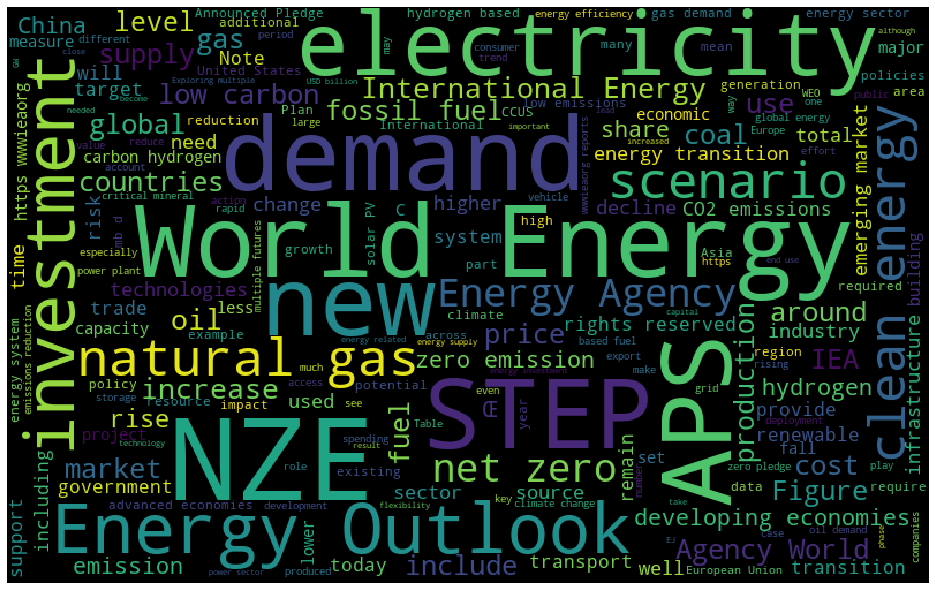

In [56]:
# create a wordbag
# visualization of the stemmed sentences

from wordcloud import WordCloud
wordcloud_low = WordCloud( width = 800, height = 500, random_state = 24,
                         max_font_size = 100).generate(text_total)
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud_low)
plt.tight_layout(pad = 0)
plt.show()